<a href="https://colab.research.google.com/github/mayurandhare13/LS-Data-Science/blob/master/MAYUR_ANDHARE_LSDS_Intro_Course_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Python

Write a function that will be passed an integer value. Your function should sum up all the positive integers that are less than or equal to the passed in value. For example, if the number 5 were passed to the function, the function should return 15 because 5+4+3+2+1 = 15. If it were passed 7 it should return 28 because 7+6+5+4+3+2+1 = 28.

You can name your function whatever you like. In order to verify what the function is returning, call your function and pass it an integer of your choosing.

The following test-cases should all pass: 

yourFunction(0) => 0

yourFunction(1) => 1

yourFunction(2) => 3

yourFunction(3) => 6

yourFunction(4) => 10

yourFunction(5) => 15


In [0]:
def sumUp(n):
  if (n == 0):
    return n
  return n + sumUp(n-1)

In [4]:
sumUp(5)

15

#2) Data Exploration

- Import Pandas
- Read the CSV found at this URL into a pandas dataframe: 
    [NFL Plays Dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/NFL-Plays-Small.csv)
- Output the size of the dataframe
- Output the first 5 rows of the dataframe
- Find the number of missing values in each column
- Fill the NaN (missing) values using [pandas.DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html)
- Create a scatterplot using the 'ydstogo' and 'Drive' variables

Feel free to add extra text and code cells as necesary.

In [0]:
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/NFL-Plays-Small.csv')
df.shape

(10000, 13)

In [7]:
df.head(5)

,GameID,Drive,qtr,down,time,yrdline100,ydstogo,posteam,DefensiveTeam,Yards.Gained,Touchdown,PlayType,Season
0,2014122806,9,3,1.0,14:57,65.0,10,MIN,CHI,0,0,Pass,2014
1,2014110600,15,3,1.0,15:00,80.0,10,CLE,CIN,0,0,Run,2014
2,2013091501,22,4,4.0,07:24,51.0,6,CLE,BAL,0,0,Punt,2013
3,2017010108,19,3,2.0,01:41,50.0,2,PIT,CLE,9,0,Pass,2016
4,2017101504,29,4,1.0,04:58,69.0,10,DET,NO,0,0,No Play,2017


In [8]:
df.describe()

,GameID,Drive,qtr,down,yrdline100,ydstogo,Yards.Gained,Touchdown,Season
count,1.000000e+04,10000.000000,10000.000000,8505.000000,9984.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.013197e+09,12.385100,2.574800,2.001764,48.762520,7.329600,4.814000,0.027400,2013.057700
std,2.573354e+06,7.257194,1.141111,0.998527,25.035069,4.873514,8.761819,0.163254,2.579309
min,2.009091e+09,1.000000,1.000000,1.000000,1.000000,0.000000,-28.000000,0.000000,2009.000000
25%,2.011102e+09,6.000000,2.000000,1.000000,30.000000,3.000000,0.000000,0.000000,2011.000000
50%,2.013112e+09,12.000000,3.000000,2.000000,50.000000,9.000000,1.000000,0.000000,2013.000000
75%,2.015121e+09,18.000000,4.000000,3.000000,70.000000,10.000000,7.000000,0.000000,2015.000000
max,2.017123e+09,35.000000,5.000000,4.000000,99.000000,40.000000,98.000000,1.000000,2017.000000


In [9]:
df.isna().sum()

GameID              0
Drive               0
qtr                 0
down             1495
time                4
yrdline100         16
ydstogo             0
posteam           624
DefensiveTeam     624
Yards.Gained        0
Touchdown           0
PlayType            0
Season              0
dtype: int64

In [10]:
df.down = df.down.fillna(df.down.mean())
df.time = df.time.fillna(method='ffill')
df.yrdline100 = df.yrdline100.fillna(df.yrdline100.mean())
df.posteam = df.posteam.fillna(method='ffill')
df.DefensiveTeam = df.DefensiveTeam.fillna(method='bfill')
df.isna().sum()

GameID           0
Drive            0
qtr              0
down             0
time             0
yrdline100       0
ydstogo          0
posteam          0
DefensiveTeam    0
Yards.Gained     0
Touchdown        0
PlayType         0
Season           0
dtype: int64

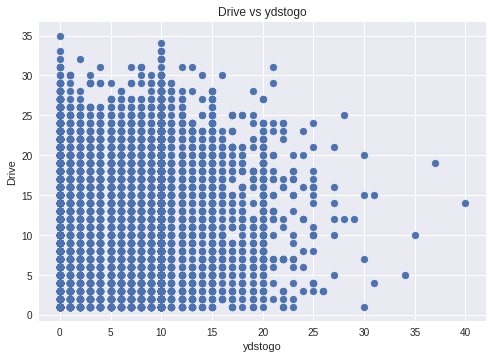

In [11]:
plt.scatter(df.ydstogo, df.Drive);
plt.xlabel('ydstogo')
plt.ylabel('Drive')
plt.title("Drive vs ydstogo")
plt.show()

# 3) Statistics

- Calculate the Mean, Median, and Mode of the "Drives" column 
- Create a histogram to show the distribution of the "Drives" column.

Feel free to add extra text and code cells as necesary.

In [12]:
df.Drive.mean(), df.Drive.median(), df.Drive.mode()

(12.3851, 12.0, 0    1
 dtype: int64)

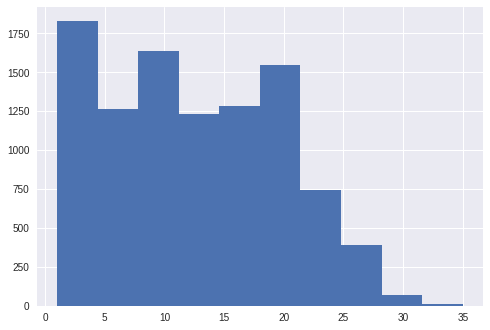

In [13]:
plt.hist(df.Drive);

#4) Hypothesis Testing

- Print the summary statistics of the dataset using the [.describe()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) function (This should help you check the work you did above)
- Use a method other than the .describe() function to calculate the standard deviation of the "Drive" column.
- How many standard deviations away from the mean is a value of 20 Drives?
- What would be the corresponding standard score (z-score) for a value of 20 Drives? 

Feel free to add extra text and code cells as necesary.

In [14]:
df.describe()

,GameID,Drive,qtr,down,yrdline100,ydstogo,Yards.Gained,Touchdown,Season
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.013197e+09,12.385100,2.574800,2.001764,48.762520,7.329600,4.814000,0.027400,2013.057700
std,2.573354e+06,7.257194,1.141111,0.920859,25.015031,4.873514,8.761819,0.163254,2.579309
min,2.009091e+09,1.000000,1.000000,1.000000,1.000000,0.000000,-28.000000,0.000000,2009.000000
25%,2.011102e+09,6.000000,2.000000,1.000000,30.000000,3.000000,0.000000,0.000000,2011.000000
50%,2.013112e+09,12.000000,3.000000,2.000000,50.000000,9.000000,1.000000,0.000000,2013.000000
75%,2.015121e+09,18.000000,4.000000,3.000000,70.000000,10.000000,7.000000,0.000000,2015.000000
max,2.017123e+09,35.000000,5.000000,4.000000,99.000000,40.000000,98.000000,1.000000,2017.000000


In [15]:
df.Drive.std()

7.25719399468332

In [32]:
import random
X = []
for _ in range(10000):
  X = X + (random.sample(list(df.Drive), 1000))
  
print(len(X))



10000000


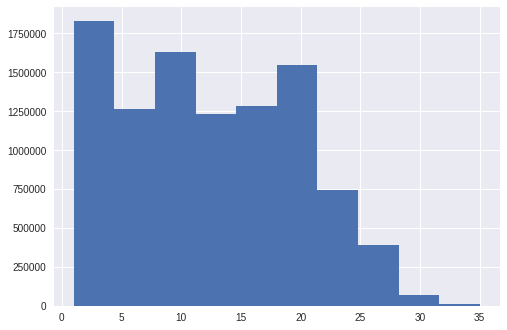

In [33]:
plt.hist(X);

In [34]:
from statistics import mean, stdev
std_score = (20-mean(X)) / df.Drive.std()
print(std_score)

1.0493255803246997
